# Building a model for targeting new mortgage customers

## Exploring data

In [504]:
# Importing packages and loading data
# From manually exploring CSV files, we can see that semicolon is used as separator and
# that comma is used as a floating point, so we need to take that into account when reading files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use("seaborn")
pc = pd.read_csv("Potential Customers.csv", sep=";", decimal=",")
rd = pd.read_csv("Retail data.csv", sep=";", decimal=",")

In [505]:
# Previewing both tables
pc.head()

,Cocunut,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
0,80001,32,3,M,HGH,PVE,M,423.076923,1985-01-21,2005-01-01,2014-07-02,143.000000
1,80002,51,10,W,SEC,RET,F,140.610231,2010-10-23,9999-10-01,2007-02-21,2288.700154
2,80003,36,7,M,BCR,STE,F,326.923077,1981-10-16,2009-09-10,2009-10-26,2268.491692
3,80004,46,11,D,BCR,TEA,F,738.820000,2008-09-01,2005-11-01,2005-11-30,4536.983462
4,80005,39,10,M,HGH,PVE,M,483.928231,1993-09-01,2013-06-01,2006-12-05,3076.923077


In [506]:
rd.head()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
0,1,Y,50.0,52,13,M,HGH,PVE,M,909.501308,1979-04-18,2010-01-01,2004-03-16,7648.350692
1,9,Y,48.0,49,11,M,HGH,SFE,M,288.461538,1999-12-16,2004-01-20,2005-11-07,30189.904920
2,11,Y,53.0,55,14,M,BCR,STE,M,1280.528692,2005-06-28,1990-09-01,2003-06-25,50553.174540
3,12,Y,64.0,66,10,M,BCR,OTH,F,620.959769,2000-12-22,9999-10-01,2006-12-21,15907.283380
4,18,Y,46.0,47,9,S,MAS,PVE,F,2239.853846,2009-08-01,2013-12-24,2007-08-07,27916.192620


In [507]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cocunut                 23983 non-null  int64  
 1   Mortgage_YN             23983 non-null  object 
 2   AGE_AT_ORIGINATION      306 non-null    float64
 3   AGE                     23983 non-null  int64  
 4   YEARS_WITH_BANK         23983 non-null  int64  
 5   MARTIAL_STATUS          23983 non-null  object 
 6   EDUCATION               23983 non-null  object 
 7   EMPLOYMENT              23983 non-null  object 
 8   GENDER                  23983 non-null  object 
 9   CUST_INCOME             23983 non-null  float64
 10  CURRENT_ADDRESS_DATE    23983 non-null  object 
 11  CURRENT_JOB_DATE        23983 non-null  object 
 12  CURRENT_WITH_BANK_DATE  23983 non-null  object 
 13  CURRENT_BALANCE_EUR     23983 non-null  float64
dtypes: float64(3), int64(3), object(8)
mem

### Exploration and changing data will be done using retail data, and then applied to potential customers data.
### First of all, we will explore all the features, one by one, starting with the label

In [508]:
rd["Mortgage_YN"].describe()

count     23983
unique        2
top           N
freq      23677
Name: Mortgage_YN, dtype: object

In [509]:
rd.groupby("Mortgage_YN").count()

,Cocunut,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
Mortgage_YN,,,,,,,,,,,,,
N,23677,0,23677,23677,23677,23677,23677,23677,23677,23677,23677,23677,23677
Y,306,306,306,306,306,306,306,306,306,306,306,306,306


We can see from the table above that data is highly unbalanced in favor of people who didn't get a mortgage. Besides that, it is clear that the feature "AGE_AT_ORIGINATION" is only available for people with a mortgage.
### Next thing to do is changing values of label "Mortgage_YN" 1 for "Y" and 0 for "N"

In [510]:
rd["Mortgage_YN"] = (rd["Mortgage_YN"] == "Y").astype(int)
rd.head()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
0,1,1,50.0,52,13,M,HGH,PVE,M,909.501308,1979-04-18,2010-01-01,2004-03-16,7648.350692
1,9,1,48.0,49,11,M,HGH,SFE,M,288.461538,1999-12-16,2004-01-20,2005-11-07,30189.904920
2,11,1,53.0,55,14,M,BCR,STE,M,1280.528692,2005-06-28,1990-09-01,2003-06-25,50553.174540
3,12,1,64.0,66,10,M,BCR,OTH,F,620.959769,2000-12-22,9999-10-01,2006-12-21,15907.283380
4,18,1,46.0,47,9,S,MAS,PVE,F,2239.853846,2009-08-01,2013-12-24,2007-08-07,27916.192620


In [511]:
rd

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
0,1,1,50.0,52,13,M,HGH,PVE,M,909.501308,1979-04-18,2010-01-01,2004-03-16,7648.350692
1,9,1,48.0,49,11,M,HGH,SFE,M,288.461538,1999-12-16,2004-01-20,2005-11-07,30189.904920
2,11,1,53.0,55,14,M,BCR,STE,M,1280.528692,2005-06-28,1990-09-01,2003-06-25,50553.174540
3,12,1,64.0,66,10,M,BCR,OTH,F,620.959769,2000-12-22,9999-10-01,2006-12-21,15907.283380
4,18,1,46.0,47,9,S,MAS,PVE,F,2239.853846,2009-08-01,2013-12-24,2007-08-07,27916.192620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23978,79979,0,NaN,67,3,M,BCR,RET,M,179.216308,1999-03-10,9999-10-01,2014-06-02,781.190000
23979,79982,0,NaN,59,13,M,HGH,PVE,F,690.095154,1997-01-01,2004-01-01,2004-01-12,13716.366380
23980,79983,0,NaN,68,7,W,PRS,RET,M,255.949846,1949-10-27,9999-10-01,2009-12-01,1066.280000
23981,79985,0,NaN,59,2,M,BCR,STE,M,459.323077,2003-04-01,2008-09-24,2015-04-23,4577.400385


### We are going to look at features "AGE" and "YEARS_WITH_BANK" now. These two are numerical features, which we can use to our advantage.

In [512]:
print(rd["AGE"].describe())
rd["YEARS_WITH_BANK"].describe()

count    23983.000000
mean        49.004378
std         12.976205
min         20.000000
25%         39.000000
50%         49.000000
75%         60.000000
max         92.000000
Name: AGE, dtype: float64


count    23983.000000
mean         7.370804
std          4.320568
min          0.000000
25%          3.000000
50%          9.000000
75%         11.000000
max         40.000000
Name: YEARS_WITH_BANK, dtype: float64

We can see that these two features are numerical, so we will leave them as they are for now.
### We will look at feature "MARTIAL_STATUS"

In [513]:
rd["MARTIAL_STATUS"].describe()

count     23983
unique        5
top           M
freq      17024
Name: MARTIAL_STATUS, dtype: object

In [514]:
rd["MARTIAL_STATUS"].unique()

array(['M', 'S', '*noval*', 'D', 'W'], dtype=object)

We will assume that "M" stands for married, "S" for single, "D" for divorced, and "W" for widowed. 
The value "*noval*" represents unknown value or "nan" value.

In [515]:
rd.groupby("MARTIAL_STATUS").count()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
MARTIAL_STATUS,,,,,,,,,,,,,
*noval*,43,43,2,43,43,43,43,43,43,43,43,43,43
D,1364,1364,16,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364
M,17024,17024,207,17024,17024,17024,17024,17024,17024,17024,17024,17024,17024
S,4223,4223,71,4223,4223,4223,4223,4223,4223,4223,4223,4223,4223
W,1329,1329,10,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329


### We will leave "*novel*" to be its category.
### The next features to be analyzed are "EDUCATION", "EDUCATION" and "GENDER"

In [516]:
rd["EDUCATION"].describe()

count     23983
unique        8
top         HGH
freq      15987
Name: EDUCATION, dtype: object

In [517]:
rd["EDUCATION"].unique()

array(['HGH', 'BCR', 'MAS', 'SEC', 'PHD', 'PRS', 'PRI', 'OTH'],
      dtype=object)

There are no nan values for this feature.

In [518]:
rd.groupby("EDUCATION").count()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
EDUCATION,,,,,,,,,,,,,
BCR,6629,6629,170,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629
HGH,15987,15987,99,15987,15987,15987,15987,15987,15987,15987,15987,15987,15987
MAS,193,193,19,193,193,193,193,193,193,193,193,193,193
OTH,2,2,0,2,2,2,2,2,2,2,2,2,2
PHD,117,117,10,117,117,117,117,117,117,117,117,117,117
PRI,6,6,0,6,6,6,6,6,6,6,6,6,6
PRS,633,633,4,633,633,633,633,633,633,633,633,633,633
SEC,416,416,4,416,416,416,416,416,416,416,416,416,416


In [519]:
# "EMPLOYMENT"
rd["EMPLOYMENT"].describe()

count     23983
unique        5
top         PVE
freq      10743
Name: EMPLOYMENT, dtype: object

In [520]:
rd["EMPLOYMENT"].unique()

array(['PVE', 'SFE', 'STE', 'OTH', 'RET'], dtype=object)

There are no nan values for this feature.

In [521]:
rd.groupby("EMPLOYMENT").count()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
EMPLOYMENT,,,,,,,,,,,,,
OTH,166,166,8,166,166,166,166,166,166,166,166,166,166
PVE,10743,10743,185,10743,10743,10743,10743,10743,10743,10743,10743,10743,10743
RET,6100,6100,8,6100,6100,6100,6100,6100,6100,6100,6100,6100,6100
SFE,265,265,23,265,265,265,265,265,265,265,265,265,265
STE,6709,6709,82,6709,6709,6709,6709,6709,6709,6709,6709,6709,6709


In [522]:
# "GENDER"
rd["GENDER"].describe()

count     23983
unique        2
top           F
freq      12105
Name: GENDER, dtype: object

In [523]:
rd.groupby("GENDER").count()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
GENDER,,,,,,,,,,,,,
F,12105,12105,131,12105,12105,12105,12105,12105,12105,12105,12105,12105,12105
M,11878,11878,175,11878,11878,11878,11878,11878,11878,11878,11878,11878,11878


### Values for this feature should be converted into numeric values.

In [524]:
rd["GENDER"] = (rd["GENDER"] == "F").astype(int)
rd.head()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
0,1,1,50.0,52,13,M,HGH,PVE,0,909.501308,1979-04-18,2010-01-01,2004-03-16,7648.350692
1,9,1,48.0,49,11,M,HGH,SFE,0,288.461538,1999-12-16,2004-01-20,2005-11-07,30189.904920
2,11,1,53.0,55,14,M,BCR,STE,0,1280.528692,2005-06-28,1990-09-01,2003-06-25,50553.174540
3,12,1,64.0,66,10,M,BCR,OTH,1,620.959769,2000-12-22,9999-10-01,2006-12-21,15907.283380
4,18,1,46.0,47,9,S,MAS,PVE,1,2239.853846,2009-08-01,2013-12-24,2007-08-07,27916.192620


### We will look at features "CUST_INCOME" and "CURRENT_BALANCE_EUR"

In [525]:
rd[["CURRENT_BALANCE_EUR", "CUST_INCOME"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CURRENT_BALANCE_EUR  23983 non-null  float64
 1   CUST_INCOME          23983 non-null  float64
dtypes: float64(2)
memory usage: 374.9 KB


In [526]:
rd[["CURRENT_BALANCE_EUR", "CUST_INCOME"]].describe()

,CURRENT_BALANCE_EUR,CUST_INCOME
count,23983.000000,23983.000000
mean,1960.854473,381.512485
std,5023.234656,486.255438
min,0.000000,0.000000
25%,107.677577,212.304538
50%,428.067000,287.355692
75%,2307.692308,406.100269
max,187940.645500,25741.920000


### We are going on with the analysis by looking at features that are representing dates "CURRENT_ADDRESS_DATE", "CURRENT_JOB_DATE" and "CURRENT_WITH_BANK_DATE"

In [527]:
rd[["CURRENT_ADDRESS_DATE", "CURRENT_JOB_DATE", "CURRENT_WITH_BANK_DATE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CURRENT_ADDRESS_DATE    23983 non-null  object
 1   CURRENT_JOB_DATE        23983 non-null  object
 2   CURRENT_WITH_BANK_DATE  23983 non-null  object
dtypes: object(3)
memory usage: 562.2+ KB


### It is necessary to check if there are any unrealistic date values, like every date in the future (later than 2021-01-01), or before 1900-01-01.

In [528]:
# "CURRENT_ADDRESS_DATE"
print(rd.loc[rd["CURRENT_ADDRESS_DATE"]<"1900"])
rd.loc[rd["CURRENT_ADDRESS_DATE"]>"2021"]["CURRENT_ADDRESS_DATE"].unique()

Empty DataFrame
Columns: [Cocunut, Mortgage_YN, AGE_AT_ORIGINATION, AGE, YEARS_WITH_BANK, MARTIAL_STATUS, EDUCATION, EMPLOYMENT, GENDER, CUST_INCOME, CURRENT_ADDRESS_DATE, CURRENT_JOB_DATE, CURRENT_WITH_BANK_DATE, CURRENT_BALANCE_EUR]
Index: []


array(['9999-10-01', '2047-03-21', '2049-08-12', '2049-12-03',
       '2048-03-14', '2049-11-16', '2048-05-28', '2038-12-08',
       '2046-09-03', '2049-11-29', '2047-03-01', '2048-11-13',
       '2049-12-16', '2049-10-21'], dtype=object)

In [529]:
# "CURRENT_JOB_DATE"
print(rd.loc[rd["CURRENT_JOB_DATE"]<"1900"])
rd.loc[rd["CURRENT_JOB_DATE"]>"2021"]["CURRENT_JOB_DATE"].unique()

Empty DataFrame
Columns: [Cocunut, Mortgage_YN, AGE_AT_ORIGINATION, AGE, YEARS_WITH_BANK, MARTIAL_STATUS, EDUCATION, EMPLOYMENT, GENDER, CUST_INCOME, CURRENT_ADDRESS_DATE, CURRENT_JOB_DATE, CURRENT_WITH_BANK_DATE, CURRENT_BALANCE_EUR]
Index: []


array(['9999-10-01'], dtype=object)

Value "9999-10-01" represents some kind of a nan value.

In [530]:
# "CURRENT_WITH_BANK_DATE"
print(rd.loc[rd["CURRENT_WITH_BANK_DATE"]<"1900"])
rd.loc[rd["CURRENT_WITH_BANK_DATE"]>"2021"]

Empty DataFrame
Columns: [Cocunut, Mortgage_YN, AGE_AT_ORIGINATION, AGE, YEARS_WITH_BANK, MARTIAL_STATUS, EDUCATION, EMPLOYMENT, GENDER, CUST_INCOME, CURRENT_ADDRESS_DATE, CURRENT_JOB_DATE, CURRENT_WITH_BANK_DATE, CURRENT_BALANCE_EUR]
Index: []


,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR


### Only feature "CURRENT_WITH_BANK_DATE" doesn't have unrealistic values for dates. To make later calculations easier, value "9999-10-01" will be changed to value "2021-01-01".
Ways to represent this value can be hyperparameter of this model.

In [531]:
rd.replace("9999-10-01", "2021-01-01", inplace=True)
rd.loc[rd["CURRENT_ADDRESS_DATE"]>"2021"]["CURRENT_ADDRESS_DATE"].unique()

array(['2021-01-01', '2047-03-21', '2049-08-12', '2049-12-03',
       '2048-03-14', '2049-11-16', '2048-05-28', '2038-12-08',
       '2046-09-03', '2049-11-29', '2047-03-01', '2048-11-13',
       '2049-12-16', '2049-10-21'], dtype=object)

In [532]:
rd.loc[rd["CURRENT_ADDRESS_DATE"]>"2021-01-02"]

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
752,2470,0,NaN,70,13,M,BCR,RET,0,270.210231,2047-03-21,2021-01-01,2004-06-24,0.000000
3125,10483,0,NaN,68,10,M,HGH,RET,0,233.961615,2049-08-12,2021-01-01,2006-12-20,75.050615
3829,12880,0,NaN,68,15,M,BCR,RET,1,172.091154,2049-12-03,2021-01-01,2001-12-07,88.657923
6436,21600,0,NaN,69,9,M,HGH,RET,0,217.663923,2048-03-14,2021-01-01,2008-04-21,215.324462
6699,22460,0,NaN,68,3,M,BCR,RET,0,292.307692,2049-11-16,2021-01-01,2014-01-23,64.823000
7693,25788,0,NaN,69,8,M,HGH,RET,0,127.115692,2048-05-28,2021-01-01,2009-06-16,100.961077
7694,25789,0,NaN,79,2,W,HGH,RET,0,165.538308,2038-12-08,2021-01-01,2014-12-17,160.508154
8644,29062,0,NaN,71,2,S,HGH,RET,1,224.596462,2046-09-03,2021-01-01,2014-12-17,202.387231
10848,36289,0,NaN,68,2,W,HGH,RET,0,143.476539,2049-11-29,2021-01-01,2015-04-22,143.275539
13983,46465,0,NaN,71,2,S,HGH,RET,1,224.596462,2046-09-03,2021-01-01,2014-12-17,458.122769


While analyzing features "AGE" and "CURRENT_ADDRESS_DATE", it seems that we can make an assumption that the 2047 year is the wrong written year 1947 and etc. this we will take into account in the feature engineering part.

In [533]:
# Now we look into "Cocunut"
print(len(rd["Cocunut"].unique()))
rd["Cocunut"].describe()

23983


count    23983.000000
mean     39969.697786
std      22996.273034
min          1.000000
25%      20076.000000
50%      40066.000000
75%      59778.000000
max      79998.000000
Name: Cocunut, dtype: float64

From function unique and count parameter, we know that feature "Coconut" represents a unique number per person, something like id.

### Now we will analyze feature "AGE_AT_ORIGINATION"
We can see that this feature is only available for positive labels, people with a mortgage.

In [534]:
(rd[rd["AGE_AT_ORIGINATION"].notna()]["AGE"] - rd[rd["AGE_AT_ORIGINATION"].notna()]["AGE_AT_ORIGINATION"]).describe()

count    306.000000
mean       1.519608
std        0.617723
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
dtype: float64

In [535]:
rd[rd["AGE_AT_ORIGINATION"].notna()]["Mortgage_YN"].describe()

count    306.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Mortgage_YN, dtype: float64

### From results in the two cells above we can see that feature "AGE_AT_ORIGINATION" is only available for positive labels, people with a mortgage. We can see that positive data information is gathered few years after getting a mortgage, so we need to include the difference between "AGE_AT_ORIGINATION" and "AGE" in all features built that depend on time. Also for feature "AGE" in positive date, we will use values from "AGE_AT_ORIGINATION".

## Feature engineering
### In this part we will build new features and tune existing features for later modeling.


In [536]:
rd.head()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
0,1,1,50.0,52,13,M,HGH,PVE,0,909.501308,1979-04-18,2010-01-01,2004-03-16,7648.350692
1,9,1,48.0,49,11,M,HGH,SFE,0,288.461538,1999-12-16,2004-01-20,2005-11-07,30189.904920
2,11,1,53.0,55,14,M,BCR,STE,0,1280.528692,2005-06-28,1990-09-01,2003-06-25,50553.174540
3,12,1,64.0,66,10,M,BCR,OTH,1,620.959769,2000-12-22,2021-01-01,2006-12-21,15907.283380
4,18,1,46.0,47,9,S,MAS,PVE,1,2239.853846,2009-08-01,2013-12-24,2007-08-07,27916.192620


In [537]:
# The first new feature will be a division between "CURRENT_BALANCE_EUR" and "CUST_INCOME"
# to see how much monthly incomes are combined in "CURRENT_BALANCE_EUR".
rd["balance_over_income"] = rd["CURRENT_BALANCE_EUR"]/(rd["CUST_INCOME"]+1) # add 1 to avoid possible division with 0
rd.head()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR,balance_over_income
0,1,1,50.0,52,13,M,HGH,PVE,0,909.501308,1979-04-18,2010-01-01,2004-03-16,7648.350692,8.400153
1,9,1,48.0,49,11,M,HGH,SFE,0,288.461538,1999-12-16,2004-01-20,2005-11-07,30189.904920,104.296775
2,11,1,53.0,55,14,M,BCR,STE,0,1280.528692,2005-06-28,1990-09-01,2003-06-25,50553.174540,39.447556
3,12,1,64.0,66,10,M,BCR,OTH,1,620.959769,2000-12-22,2021-01-01,2006-12-21,15907.283380,25.576065
4,18,1,46.0,47,9,S,MAS,PVE,1,2239.853846,2009-08-01,2013-12-24,2007-08-07,27916.192620,12.457837


### We can get the information about the date when data is collected, by adding years from feature "YEARS_WITH_BANK" to feature CURRENT_WITH_BANK_DATE". Then we can combine that information to get different features like the time a person has a current job in days, etc. Also, we shouldn't forget to subtract difference for positive data.


In [538]:
# We will add current_addres_days, how much person lives in the current address in days.
# For this feature, we need to take into account that we have miss-written data that we addressed earlier.
a = (pd.to_datetime(rd["CURRENT_WITH_BANK_DATE"]) - pd.to_datetime(rd["CURRENT_ADDRESS_DATE"]))/np.timedelta64(1, 'D') + rd["YEARS_WITH_BANK"]*365 - rd["Mortgage_YN"]*365*(rd["AGE"]-rd["AGE_AT_ORIGINATION"].fillna(0)) + 100*365*((rd["CURRENT_ADDRESS_DATE"]>"2021-01-02").astype(int))       
a[a<0]=0
rd["current_address_days"] = a
rd.head()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR,balance_over_income,current_address_days
0,1,1,50.0,52,13,M,HGH,PVE,0,909.501308,1979-04-18,2010-01-01,2004-03-16,7648.350692,8.400153,13114.0
1,9,1,48.0,49,11,M,HGH,SFE,0,288.461538,1999-12-16,2004-01-20,2005-11-07,30189.904920,104.296775,5803.0
2,11,1,53.0,55,14,M,BCR,STE,0,1280.528692,2005-06-28,1990-09-01,2003-06-25,50553.174540,39.447556,3646.0
3,12,1,64.0,66,10,M,BCR,OTH,1,620.959769,2000-12-22,2021-01-01,2006-12-21,15907.283380,25.576065,5110.0
4,18,1,46.0,47,9,S,MAS,PVE,1,2239.853846,2009-08-01,2013-12-24,2007-08-07,27916.192620,12.457837,2195.0


This equation above seems complicated because first, we needed to subtract the difference in positive data, and then we needed to add 100 years for data that is miswritten (like the 2049 year which we will represent as 1949).
Looking at the values of the "CURRENT_ADDRESS_DATE" feature, we assume that all the negative values represent nan values, so they will be replaced with zeros.

In [539]:
# Next feature is current_job_days.
# Equation for this feature is pretty similar to the equation above
a = (pd.to_datetime(rd["CURRENT_WITH_BANK_DATE"]) - pd.to_datetime(rd["CURRENT_JOB_DATE"]))/np.timedelta64(1, 'D') + rd["YEARS_WITH_BANK"]*365 - rd["Mortgage_YN"]*365*(rd["AGE"]-rd["AGE_AT_ORIGINATION"].fillna(0))
a[a<0] = 0
rd["current_job_days"] = a
rd.head()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR,balance_over_income,current_address_days,current_job_days
0,1,1,50.0,52,13,M,HGH,PVE,0,909.501308,1979-04-18,2010-01-01,2004-03-16,7648.350692,8.400153,13114.0,1898.0
1,9,1,48.0,49,11,M,HGH,SFE,0,288.461538,1999-12-16,2004-01-20,2005-11-07,30189.904920,104.296775,5803.0,4307.0
2,11,1,53.0,55,14,M,BCR,STE,0,1280.528692,2005-06-28,1990-09-01,2003-06-25,50553.174540,39.447556,3646.0,9060.0
3,12,1,64.0,66,10,M,BCR,OTH,1,620.959769,2000-12-22,2021-01-01,2006-12-21,15907.283380,25.576065,5110.0,0.0
4,18,1,46.0,47,9,S,MAS,PVE,1,2239.853846,2009-08-01,2013-12-24,2007-08-07,27916.192620,12.457837,2195.0,589.0


### Both features above represent an interval of time in days. Neither of them can give us information about the world economy at the time. The information about that time period will be found as the difference between "2021-01-01" and the date a person got a mortgage.

In [540]:
rd["time_mortgage_days"] = (pd.to_datetime("2021-01-01") - pd.to_datetime(rd["CURRENT_WITH_BANK_DATE"]))/np.timedelta64(1, 'D') + rd["YEARS_WITH_BANK"]*365 - rd["Mortgage_YN"]*365*(rd["AGE"]-rd["AGE_AT_ORIGINATION"].fillna(0))
rd.head()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR,balance_over_income,current_address_days,current_job_days,time_mortgage_days
0,1,1,50.0,52,13,M,HGH,PVE,0,909.501308,1979-04-18,2010-01-01,2004-03-16,7648.350692,8.400153,13114.0,1898.0,10150.0
1,9,1,48.0,49,11,M,HGH,SFE,0,288.461538,1999-12-16,2004-01-20,2005-11-07,30189.904920,104.296775,5803.0,4307.0,9184.0
2,11,1,53.0,55,14,M,BCR,STE,0,1280.528692,2005-06-28,1990-09-01,2003-06-25,50553.174540,39.447556,3646.0,9060.0,10780.0
3,12,1,64.0,66,10,M,BCR,OTH,1,620.959769,2000-12-22,2021-01-01,2006-12-21,15907.283380,25.576065,5110.0,0.0,8045.0
4,18,1,46.0,47,9,S,MAS,PVE,1,2239.853846,2009-08-01,2013-12-24,2007-08-07,27916.192620,12.457837,2195.0,589.0,7816.0


We can see that we always divide with np.timedelta64(1, 'D'), this will transform the type of timedelta in days to float.

### Next we need to change the value for "AGE" in positive data.

In [541]:
rd["AGE_AT_ORIGINATION"].fillna(rd["AGE"], inplace=True)
rd.tail()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR,balance_over_income,current_address_days,current_job_days,time_mortgage_days
23978,79979,0,67.0,67,3,M,BCR,RET,0,179.216308,1999-03-10,2021-01-01,2014-06-02,781.190000,4.334735,6658.0,0.0,3500.0
23979,79982,0,59.0,59,13,M,HGH,PVE,1,690.095154,1997-01-01,2004-01-01,2004-01-12,13716.366380,19.847291,7312.0,4756.0,10944.0
23980,79983,0,68.0,68,7,W,PRS,RET,0,255.949846,1949-10-27,2021-01-01,2009-12-01,1066.280000,4.149759,24505.0,0.0,6604.0
23981,79985,0,59.0,59,2,M,BCR,STE,0,459.323077,2003-04-01,2008-09-24,2015-04-23,4577.400385,9.943886,5135.0,3132.0,2810.0
23982,79998,0,47.0,47,1,M,HGH,STE,1,528.769231,2010-01-01,2005-03-23,2016-06-06,2307.692308,4.356033,2713.0,4458.0,2035.0


We filled data in feature "AGE_AT_ORIGINATION" so it represents the real date when a person got a mortgage.

## Analysing and visualizing data

In [542]:
# Function to plot two histograms horizontally, one representing label Mortgage_YN=0 other Mortgage_YN=1
def hist2(df, ft, lab="Mortgage_YN", save=False):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
    
    hist = ax0.hist(df[df[lab]==0][ft], bins=20)
    ax0.set(title=ft + " for 'Mortgage' = 0")
    
    hist = ax1.hist(df[df[lab]==1][ft], bins=20)
    ax1.set(title=ft + " for 'Mortgage' = 1")
    if save:
        fig.savefig(ft+".png")

In [543]:
# Here we define numerical and categorical columns.
num_col = ['AGE_AT_ORIGINATION', 'YEARS_WITH_BANK', 'CUST_INCOME', 'CURRENT_BALANCE_EUR', 'balance_over_income',
       'current_address_days', 'current_job_days', 'time_mortgage_days']
cat_col = ['MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT', 'GENDER']

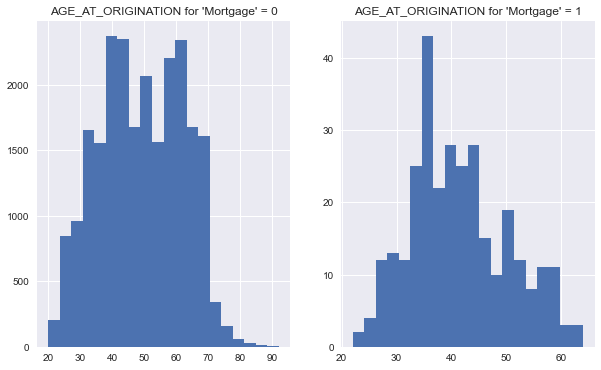

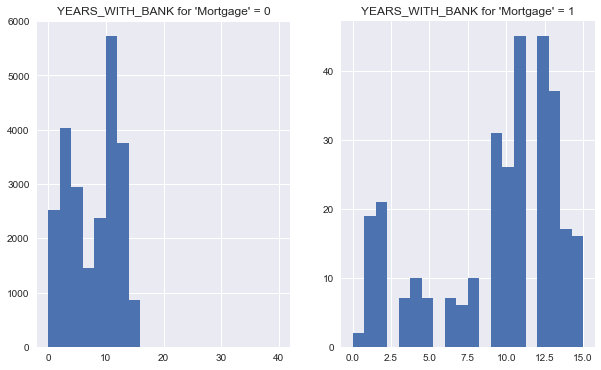

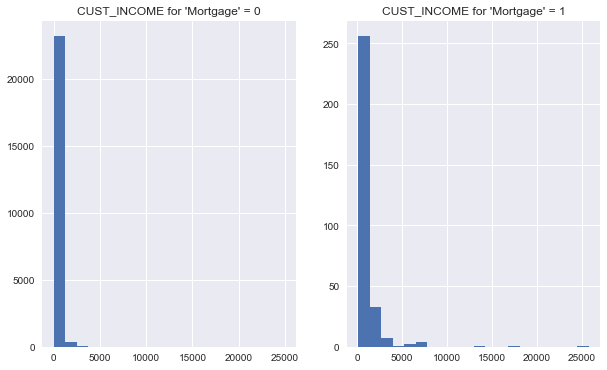

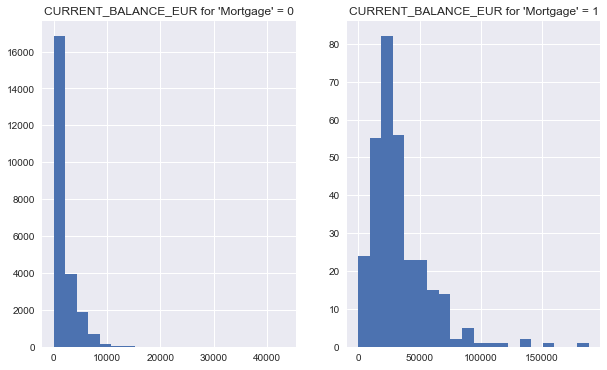

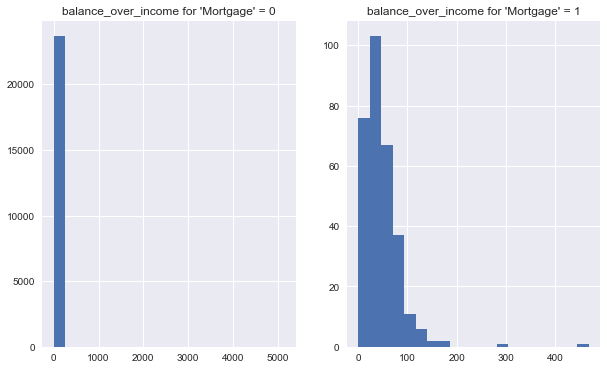

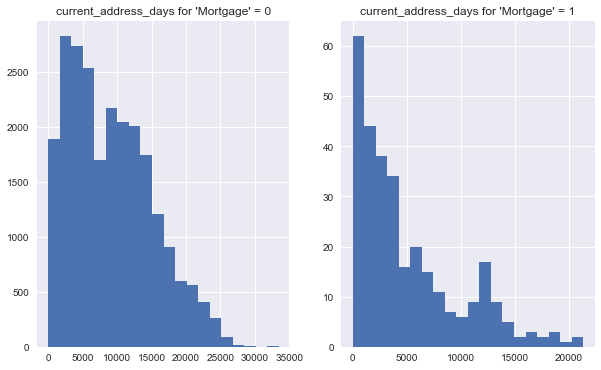

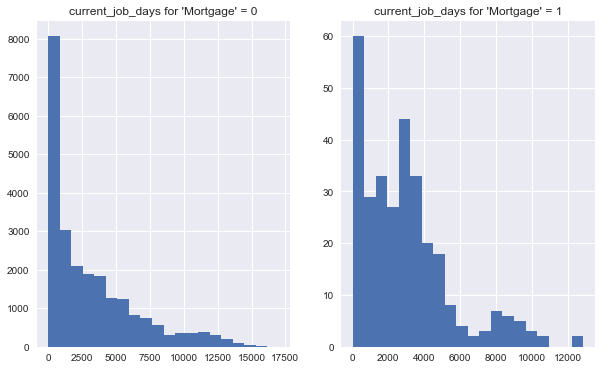

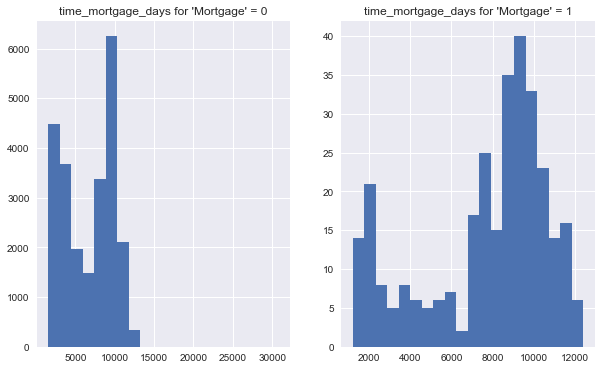

In [544]:
# We plot two horizontal histograms of label mortgage for every numerical column.
for col in num_col:
    hist2(rd, col)

In [545]:
# Categorical data will be shown as a pivot table, with the added percentage of a mortgage in each category.
for col in cat_col:
    a = rd.pivot_table(values="Cocunut", columns=col, index="Mortgage_YN", aggfunc=["count"])
    a.loc["Mortgage[%]"] = a.loc[1]/(a.loc[0]+a.loc[1])
    print(a)

                    count                                                    
MARTIAL_STATUS    *noval*           D             M            S            W
Mortgage_YN                                                                  
0               41.000000  1348.00000  16817.000000  4152.000000  1319.000000
1                2.000000    16.00000    207.000000    71.000000    10.000000
Mortgage[%]      0.046512     0.01173      0.012159     0.016813     0.007524
                   count                                                 \
EDUCATION            BCR           HGH         MAS  OTH        PHD  PRI   
Mortgage_YN                                                               
0            6459.000000  15888.000000  174.000000  2.0  107.00000  6.0   
1             170.000000     99.000000   19.000000  NaN   10.00000  NaN   
Mortgage[%]     0.025645      0.006193    0.098446  NaN    0.08547  NaN   

                                     
EDUCATION           PRS         SEC  
Mortg

### Now we will show some scatter plots of numeric features to get a better understanding of the problem.

In [546]:
# Function to plot two histograms horizontally, one representing label Mortgage_YN=0 other Mortgage_YN=1
def scatter2(df, ft1, ft2, lab="Mortgage_YN", save=False, log=False):
    fig, ax = plt.subplots(figsize=(10,6))
    
    if log:
        scat = ax.scatter(np.log(df[ft1]), np.log(df[ft2]), c=df[lab], cmap="winter")
    else:
        scat = ax.scatter(df[ft1], df[ft2], c=df[lab], cmap="winter")
    ax.set(title=ft1 + " and " + ft2, xlabel=ft1, ylabel=ft2)
    
    if save:
        fig.savefig(ft+".png")

<ipython-input-546-53a6601e0f67>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,6))


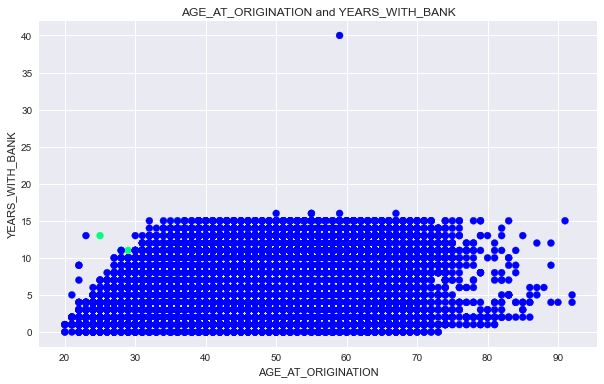

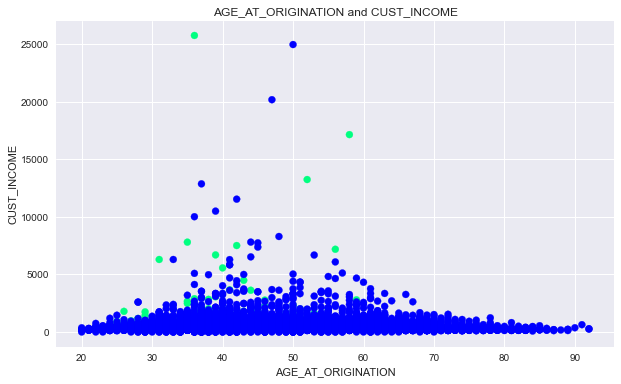

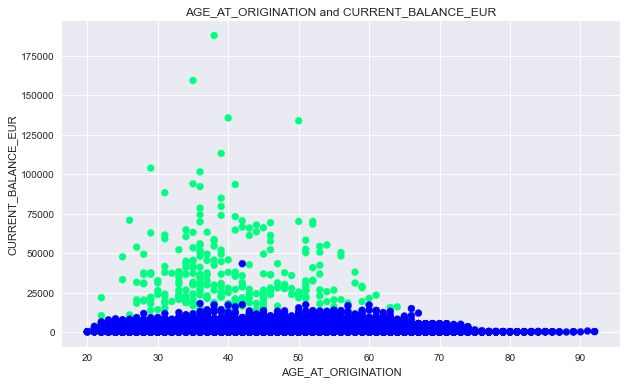

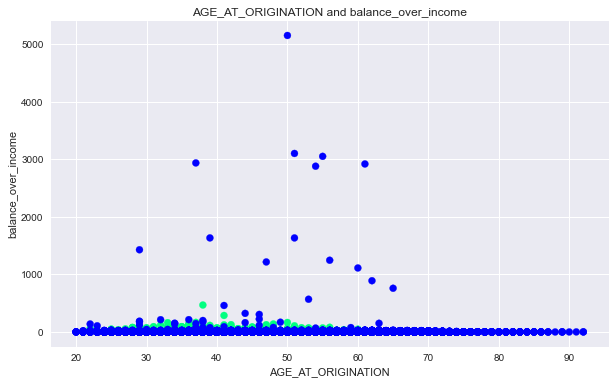

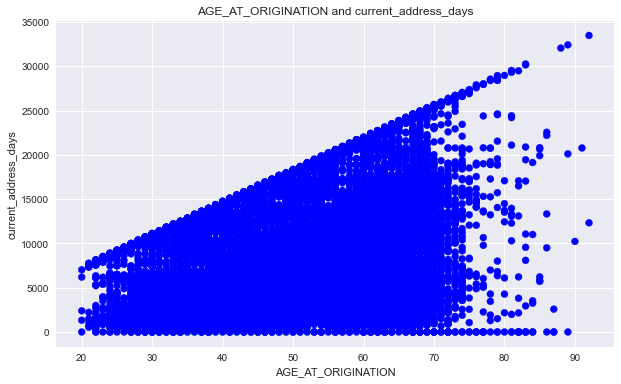

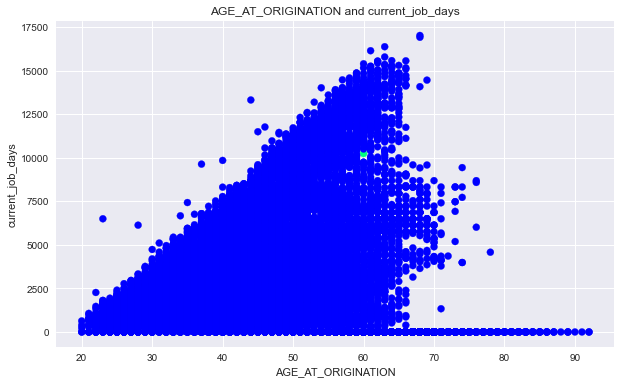

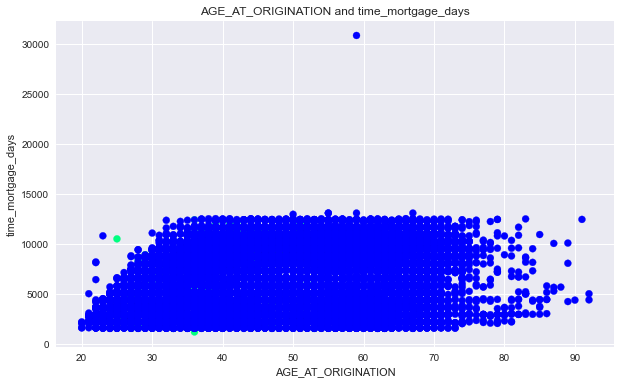

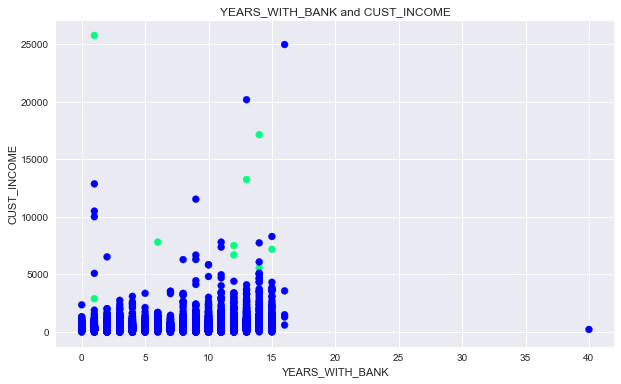

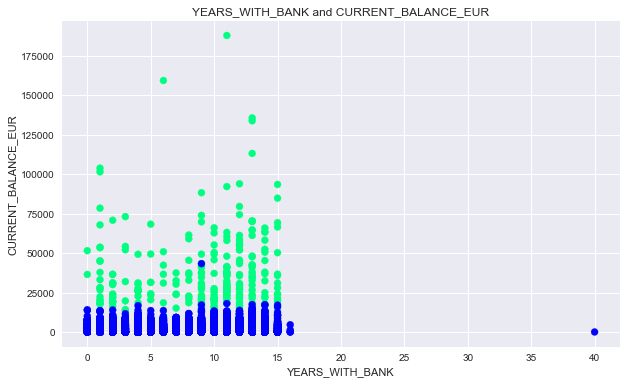

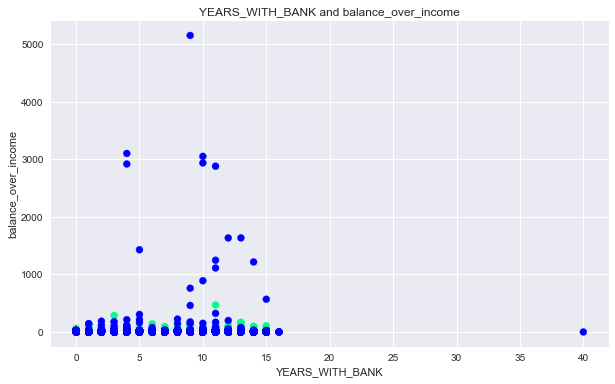

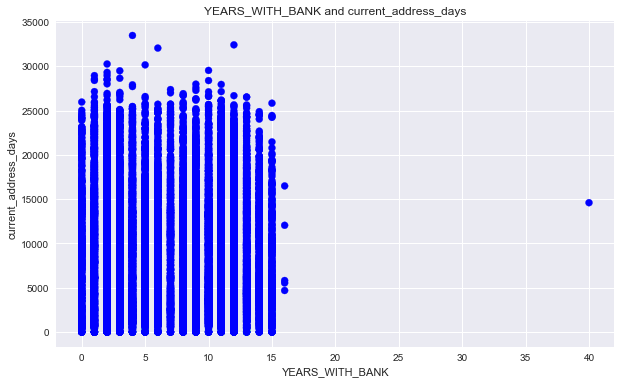

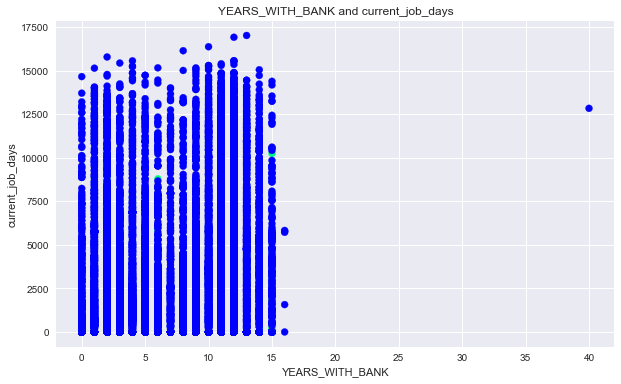

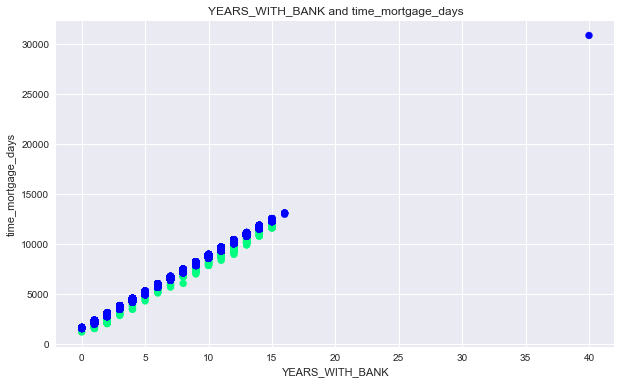

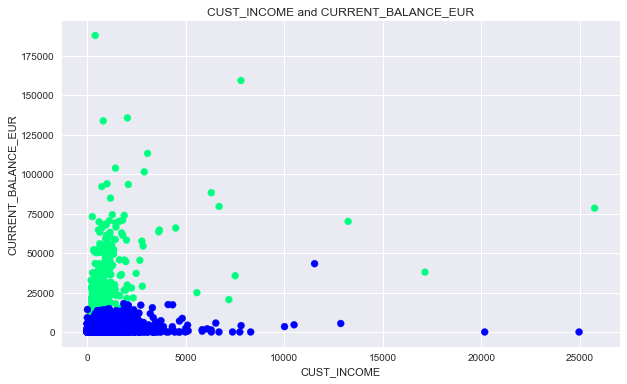

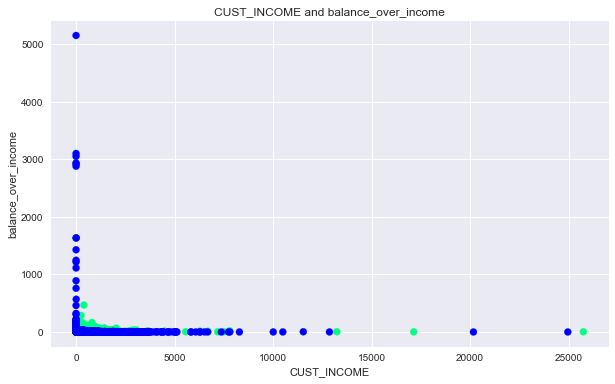

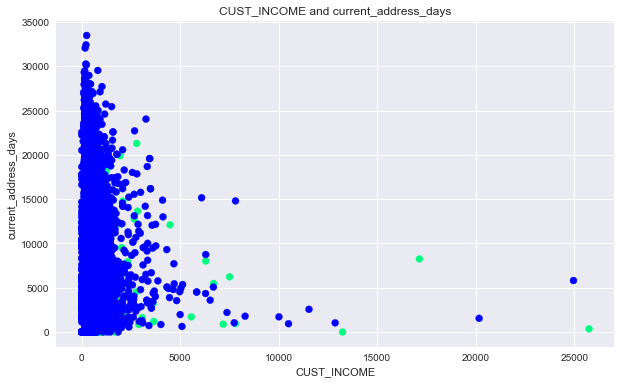

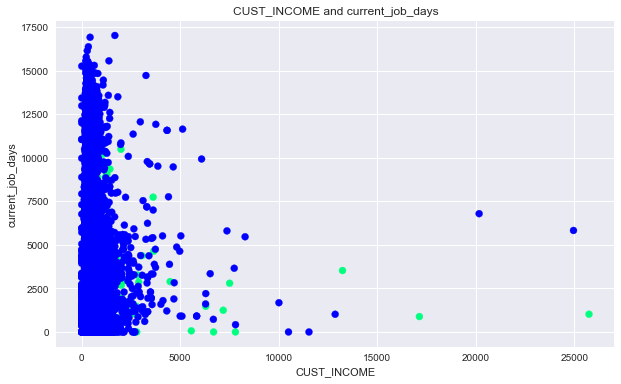

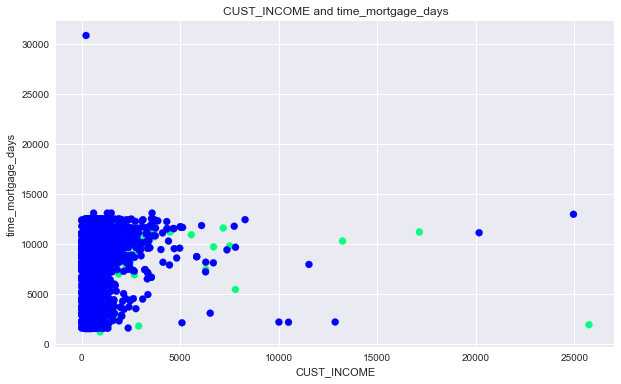

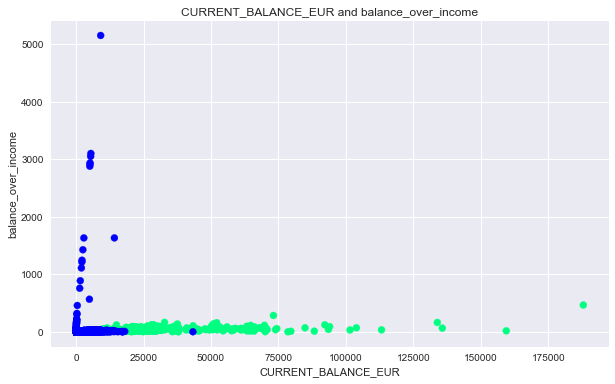

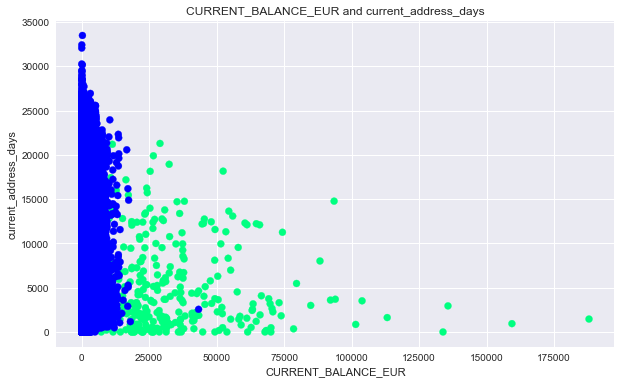

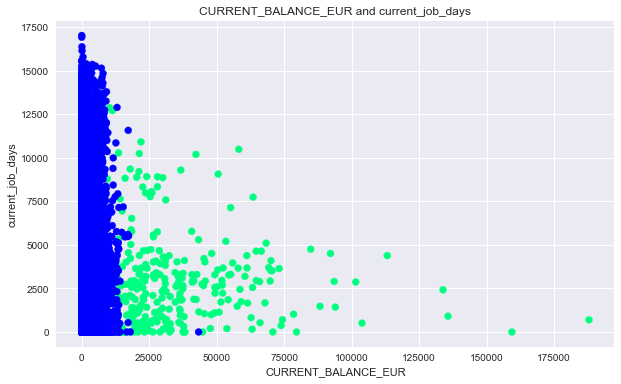

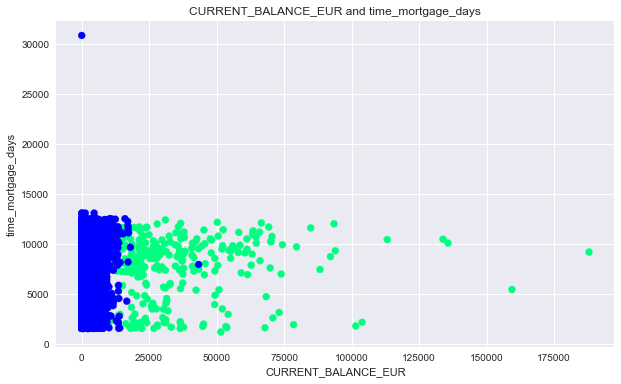

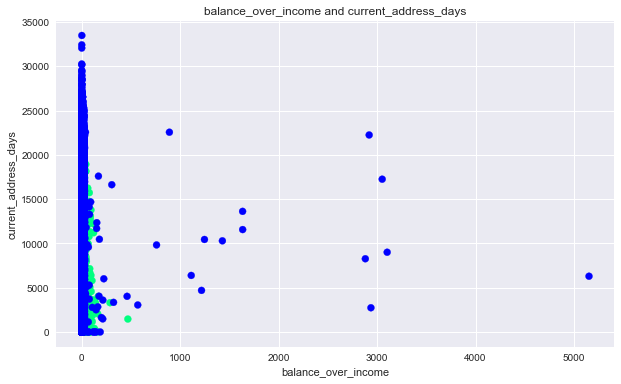

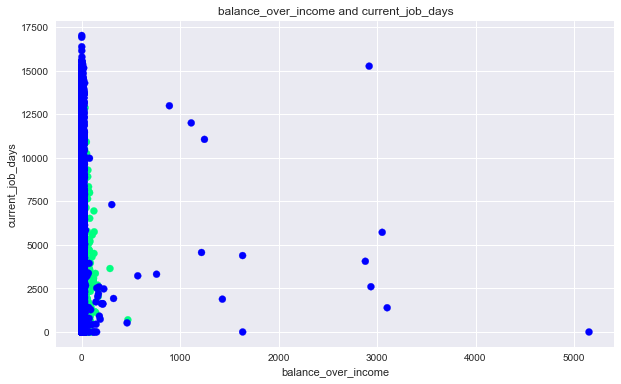

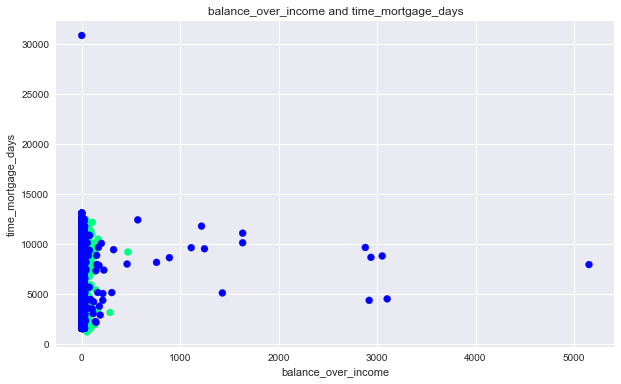

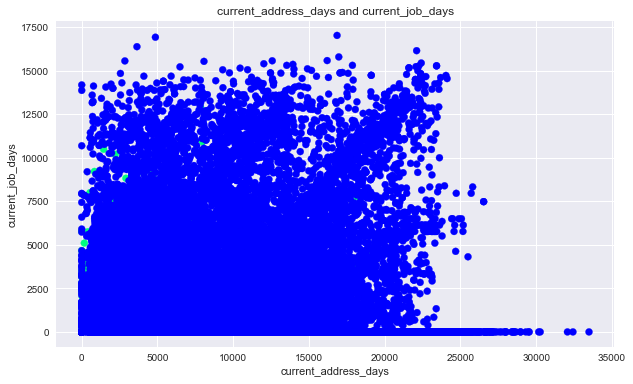

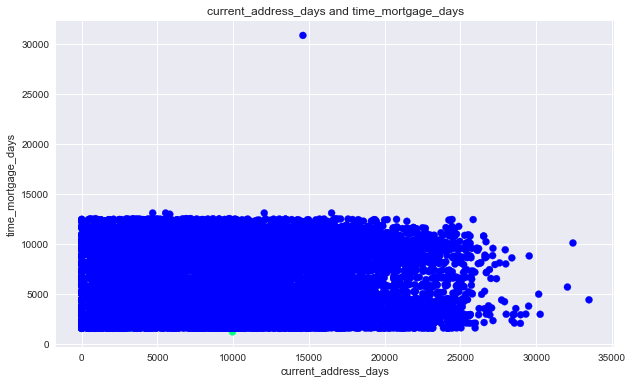

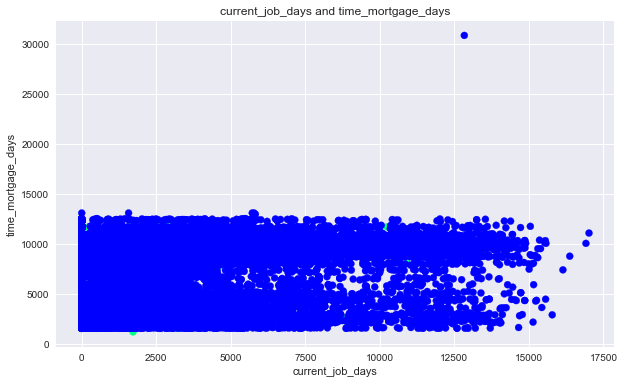

In [547]:
for i in range(len(num_col)-1):
    for j in range(i+1, len(num_col)):
        ft1=num_col[i]
        ft2=num_col[j]
        scatter2(rd, ft1, ft2)

### From the figures above we can see that there are features where classes are pretty separable.

<AxesSubplot:>

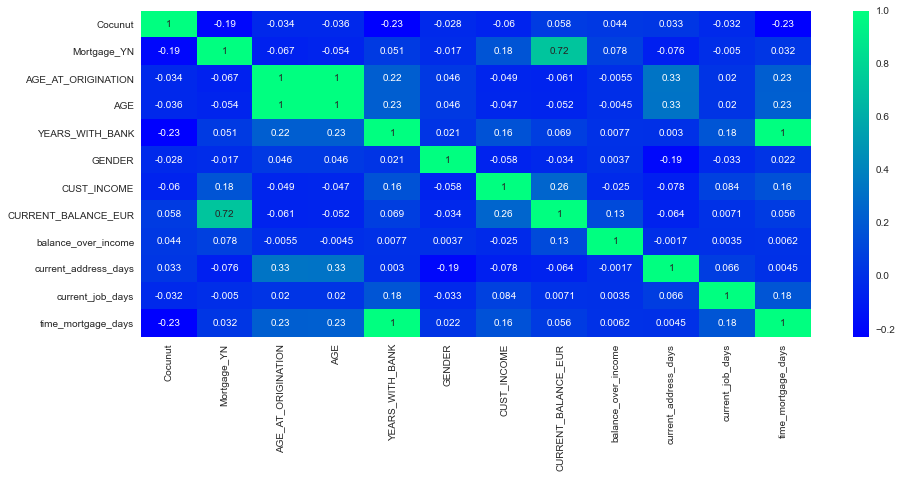

In [548]:
# Plotting heatmap for correlation coefficients with all numerical features, even binary features.
rd_corr = rd.corr()
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(rd_corr, annot=True, cmap="winter", ax=ax)

## We can see that there is a very high correlation between feature "CURRENT_BALANCE_EUR" and our label "Mortgage_YN". This is great because we can probably build very good classifiers for our label. 
### The next thing to do is to represent categorical data as numerical. Before that, we will drop all unimportant features and split data into two sets - train and test. The train set will be used for modeling and cross-validation, and the test set will be used for the final evaluation of the model.

In [549]:
rd.columns

Index(['Cocunut', 'Mortgage_YN', 'AGE_AT_ORIGINATION', 'AGE',
       'YEARS_WITH_BANK', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT',
       'GENDER', 'CUST_INCOME', 'CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE',
       'CURRENT_WITH_BANK_DATE', 'CURRENT_BALANCE_EUR', 'balance_over_income',
       'current_address_days', 'current_job_days', 'time_mortgage_days'],
      dtype='object')

### We will drop all features that represent dates because we already built numerical features out of those features. We will drop "AGE" because "AGE_AT_ORIGINATION" has more reliable information. Also, "Coconut" will be dropped because it represents something like an index.

In [489]:
rd.drop(["Cocunut", "AGE", "CURRENT_ADDRESS_DATE", "CURRENT_JOB_DATE", "CURRENT_WITH_BANK_DATE"], axis=1, inplace=True)
rd.head()

,Mortgage_YN,AGE_AT_ORIGINATION,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_BALANCE_EUR,balance_over_income,current_address_days,current_job_days,time_mortgage_days
0,1,50.0,13,M,HGH,PVE,0,909.501308,7648.350692,8.400153,13114.0,1898.0,10150.0
1,1,48.0,11,M,HGH,SFE,0,288.461538,30189.904920,104.296775,5803.0,4307.0,9184.0
2,1,53.0,14,M,BCR,STE,0,1280.528692,50553.174540,39.447556,3646.0,9060.0,10780.0
3,1,64.0,10,M,BCR,OTH,1,620.959769,15907.283380,25.576065,5110.0,0.0,8045.0
4,1,46.0,9,S,MAS,PVE,1,2239.853846,27916.192620,12.457837,2195.0,589.0,7816.0


### Now we will represent categorical data with a one-hot vector, and then we will analyze the correlation matrix and pivot table from above to combine some one-hot vectors.

<AxesSubplot:>

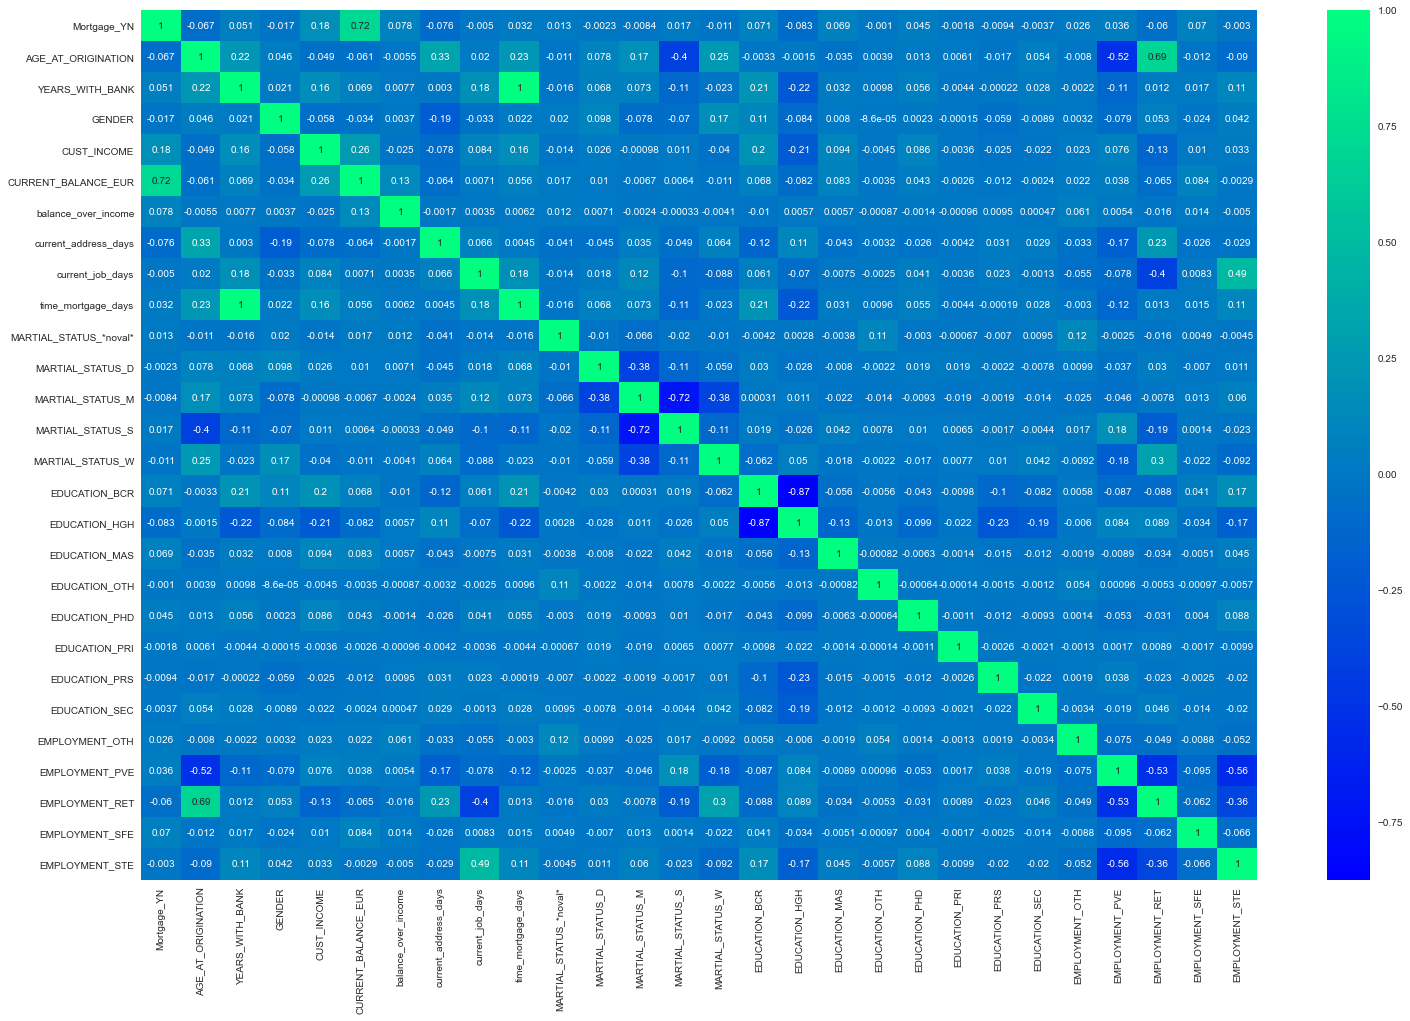

In [490]:
rd = pd.get_dummies(rd, columns=['MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT'])
rd_corr = rd.corr()
fig, ax = plt.subplots(figsize=(25,16))
sns.heatmap(rd_corr, annot=True, cmap="winter", ax=ax)

We are looking at correlation coefficients of each one-hot vector with the label, and the percentage of those categories from the pivot table. If those numbers are close in both pivot table and correlation heatmap, we will combine two or more one-hot vectors in one. They need to be near 0 (near 0.01 or -0.01) to combine them. This will be done by bitwise or operation on those vectors.

In [491]:
rd.columns

Index(['Mortgage_YN', 'AGE_AT_ORIGINATION', 'YEARS_WITH_BANK', 'GENDER',
       'CUST_INCOME', 'CURRENT_BALANCE_EUR', 'balance_over_income',
       'current_address_days', 'current_job_days', 'time_mortgage_days',
       'MARTIAL_STATUS_*noval*', 'MARTIAL_STATUS_D', 'MARTIAL_STATUS_M',
       'MARTIAL_STATUS_S', 'MARTIAL_STATUS_W', 'EDUCATION_BCR',
       'EDUCATION_HGH', 'EDUCATION_MAS', 'EDUCATION_OTH', 'EDUCATION_PHD',
       'EDUCATION_PRI', 'EDUCATION_PRS', 'EDUCATION_SEC', 'EMPLOYMENT_OTH',
       'EMPLOYMENT_PVE', 'EMPLOYMENT_RET', 'EMPLOYMENT_SFE', 'EMPLOYMENT_STE'],
      dtype='object')

In [492]:
# Building one-hot vectors as a combination of two or more, then dropping those we combined.
rd["MARTIAL_STATUS_N_S"] = rd["MARTIAL_STATUS_*noval*"] | rd["MARTIAL_STATUS_S"]
rd["MARTIAL_STATUS_D_M_W"] = rd["MARTIAL_STATUS_D"] | rd["MARTIAL_STATUS_M"] | rd["MARTIAL_STATUS_W"]
rd["EDUCATION_OTH_PRI_PRS_SEC"] = rd["EDUCATION_OTH"] | rd["EDUCATION_PRI"] | rd["EDUCATION_PRS"] | rd["EDUCATION_SEC"]
rd.drop(['MARTIAL_STATUS_*noval*', 'MARTIAL_STATUS_D', 'MARTIAL_STATUS_M',
         'MARTIAL_STATUS_S', 'MARTIAL_STATUS_W','EDUCATION_PRI',
         'EDUCATION_PRS', 'EDUCATION_SEC', 'EDUCATION_OTH'], axis=1, inplace=True)
rd.head()

,Mortgage_YN,AGE_AT_ORIGINATION,YEARS_WITH_BANK,GENDER,CUST_INCOME,CURRENT_BALANCE_EUR,balance_over_income,current_address_days,current_job_days,time_mortgage_days,...,EDUCATION_MAS,EDUCATION_PHD,EMPLOYMENT_OTH,EMPLOYMENT_PVE,EMPLOYMENT_RET,EMPLOYMENT_SFE,EMPLOYMENT_STE,MARTIAL_STATUS_N_S,MARTIAL_STATUS_D_M_W,EDUCATION_OTH_PRI_PRS_SEC
0,1,50.0,13,0,909.501308,7648.350692,8.400153,13114.0,1898.0,10150.0,...,0,0,0,1,0,0,0,0,1,0
1,1,48.0,11,0,288.461538,30189.904920,104.296775,5803.0,4307.0,9184.0,...,0,0,0,0,0,1,0,0,1,0
2,1,53.0,14,0,1280.528692,50553.174540,39.447556,3646.0,9060.0,10780.0,...,0,0,0,0,0,0,1,0,1,0
3,1,64.0,10,1,620.959769,15907.283380,25.576065,5110.0,0.0,8045.0,...,0,0,1,0,0,0,0,0,1,0
4,1,46.0,9,1,2239.853846,27916.192620,12.457837,2195.0,589.0,7816.0,...,1,0,0,1,0,0,0,1,0,0


<AxesSubplot:>

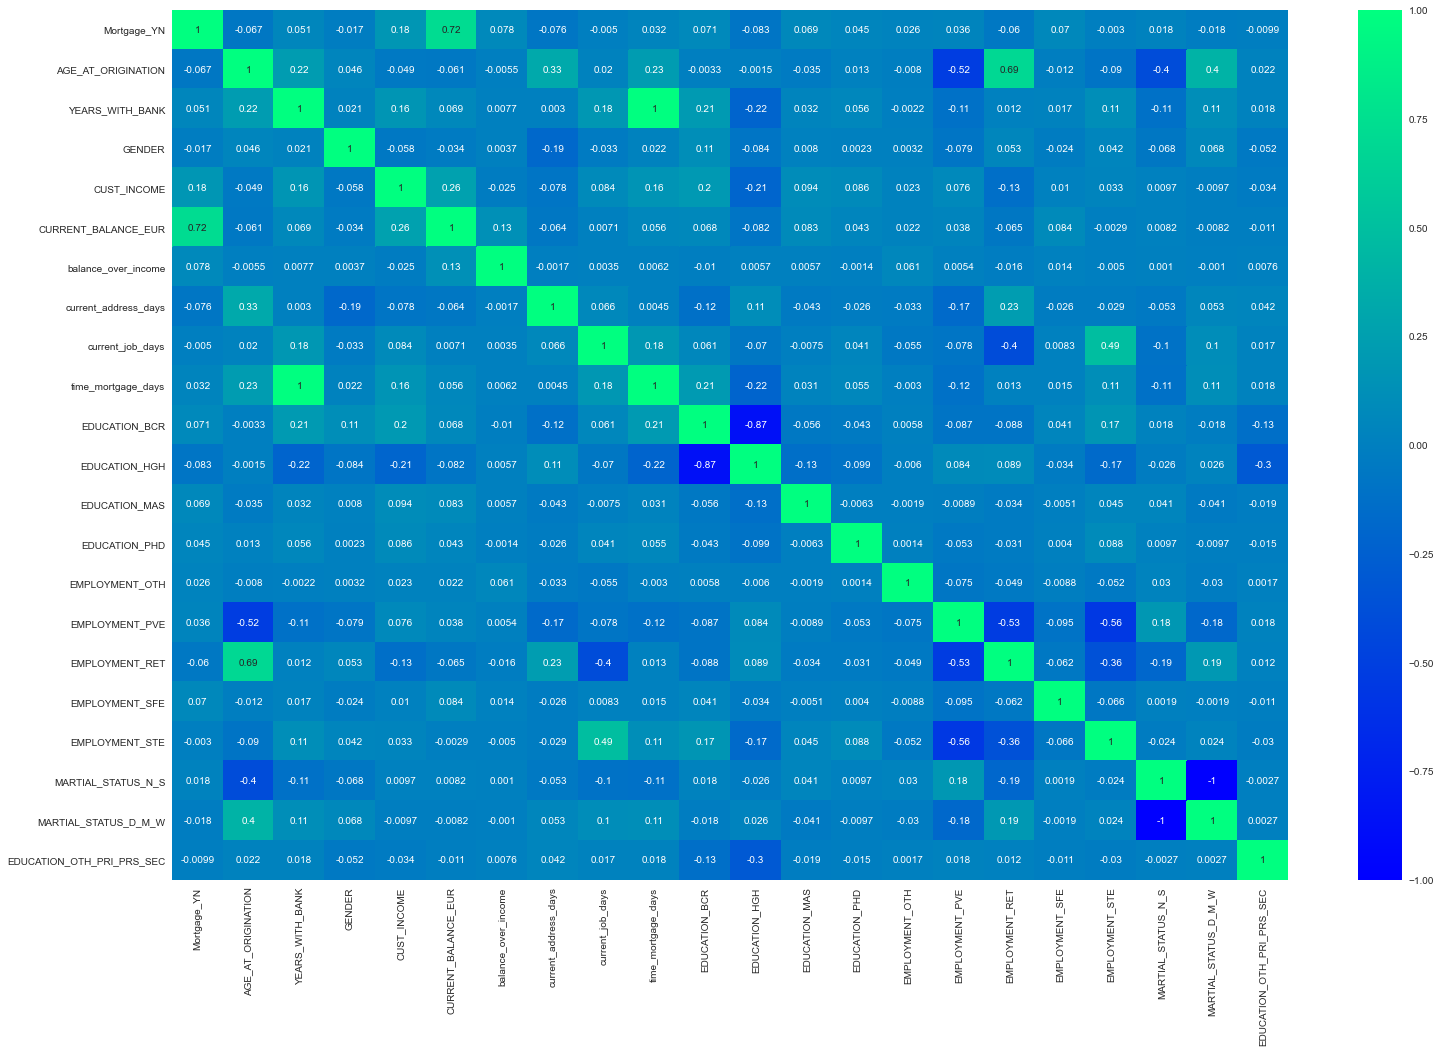

In [493]:
rd_corr = rd.corr()
fig, ax = plt.subplots(figsize=(25,16))
sns.heatmap(rd_corr, annot=True, cmap="winter", ax=ax)

### A correlation coefficient less than 0.05 absolut is viewed as an extremely unimportant feature, so we will drop all those features.
Number with which we threshold the importance of features can be a hyperparameter. The greater threshold we take the fewer features we have, which gives us less information but a faster learning process when modeling.

In [494]:
rd.columns

Index(['Mortgage_YN', 'AGE_AT_ORIGINATION', 'YEARS_WITH_BANK', 'GENDER',
       'CUST_INCOME', 'CURRENT_BALANCE_EUR', 'balance_over_income',
       'current_address_days', 'current_job_days', 'time_mortgage_days',
       'EDUCATION_BCR', 'EDUCATION_HGH', 'EDUCATION_MAS', 'EDUCATION_PHD',
       'EMPLOYMENT_OTH', 'EMPLOYMENT_PVE', 'EMPLOYMENT_RET', 'EMPLOYMENT_SFE',
       'EMPLOYMENT_STE', 'MARTIAL_STATUS_N_S', 'MARTIAL_STATUS_D_M_W',
       'EDUCATION_OTH_PRI_PRS_SEC'],
      dtype='object')

In [495]:
# rd.drop(["EDUCATION_OTH_PRI_PRS_SEC", "EMPLOYMENT_STE", "current_job_days"], axis=1, inplace=True)
rd.drop(['EMPLOYMENT_STE', 'MARTIAL_STATUS_N_S', 'MARTIAL_STATUS_D_M_W','EDUCATION_OTH_PRI_PRS_SEC', 'EMPLOYMENT_OTH', 'EMPLOYMENT_PVE', 'current_job_days', 'time_mortgage_days', 'GENDER'], axis=1, inplace=True)
rd.head()

,Mortgage_YN,AGE_AT_ORIGINATION,YEARS_WITH_BANK,CUST_INCOME,CURRENT_BALANCE_EUR,balance_over_income,current_address_days,EDUCATION_BCR,EDUCATION_HGH,EDUCATION_MAS,EDUCATION_PHD,EMPLOYMENT_RET,EMPLOYMENT_SFE
0,1,50.0,13,909.501308,7648.350692,8.400153,13114.0,0,1,0,0,0,0
1,1,48.0,11,288.461538,30189.904920,104.296775,5803.0,0,1,0,0,0,1
2,1,53.0,14,1280.528692,50553.174540,39.447556,3646.0,1,0,0,0,0,0
3,1,64.0,10,620.959769,15907.283380,25.576065,5110.0,1,0,0,0,0,0
4,1,46.0,9,2239.853846,27916.192620,12.457837,2195.0,0,0,1,0,0,0


### Now we will split data into train and test sets

In [496]:
# dividing data into training features and labels, then into train and test sets.

from sklearn.model_selection import train_test_split

X = rd.drop("Mortgage_YN", axis=1)
y = rd["Mortgage_YN"]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
probes = np.array([1 - y_train.sum()/y_train.shape[0], y_train.sum()/y_train.shape[0]])
X_train_raw.shape, X_test_raw.shape, y_train.shape, y_test.shape, probes.shape

((21584, 12), (2399, 12), (21584,), (2399,), (2,))

## Building a model

### Everything from here will be done on train data, then later applied on test data. 
### First we will scale data, then we will test some basic classifiers.

In [497]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_train = pd.DataFrame(scaler1.fit_transform(X_train_raw), columns=X_train_raw.columns)
X_train.describe()

,AGE_AT_ORIGINATION,YEARS_WITH_BANK,CUST_INCOME,CURRENT_BALANCE_EUR,balance_over_income,current_address_days,EDUCATION_BCR,EDUCATION_HGH,EDUCATION_MAS,EDUCATION_PHD,EMPLOYMENT_RET,EMPLOYMENT_SFE
count,2.158400e+04,2.158400e+04,2.158400e+04,2.158400e+04,2.158400e+04,2.158400e+04,2.158400e+04,2.158400e+04,2.158400e+04,2.158400e+04,2.158400e+04,2.158400e+04
mean,1.593322e-16,-5.958499e-17,-7.736172e-17,1.316795e-17,-2.633591e-18,9.645525e-17,-4.213745e-17,-1.043560e-16,3.950386e-17,3.291988e-18,-1.645994e-17,3.440128e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.231676e+00,-1.706669e+00,-8.157629e-01,-3.986586e-01,-1.123963e-01,-1.522938e+00,-6.194894e-01,-1.412692e+00,-8.803687e-02,-6.991778e-02,-5.871233e-01,-1.055918e-01
25%,-7.704167e-01,-1.012688e+00,-3.610209e-01,-3.764980e-01,-1.062658e-01,-8.522773e-01,-6.194894e-01,-1.412692e+00,-8.803687e-02,-6.991778e-02,-5.871233e-01,-1.055918e-01
50%,-1.332642e-03,3.752741e-01,-2.012746e-01,-3.100660e-01,-9.369145e-02,-1.086554e-01,-6.194894e-01,7.078686e-01,-8.803687e-02,-6.991778e-02,-5.871233e-01,-1.055918e-01
75%,8.446599e-01,8.379281e-01,5.254509e-02,7.460914e-02,1.751522e-02,6.951283e-01,1.614233e+00,7.078686e-01,-8.803687e-02,-6.991778e-02,1.703220e+00,-1.055918e-01
max,3.305729e+00,7.546412e+00,5.263930e+01,3.833296e+01,8.120838e+01,4.061147e+00,1.614233e+00,7.078686e-01,1.135888e+01,1.430251e+01,1.703220e+00,9.470432e+00


<AxesSubplot:>

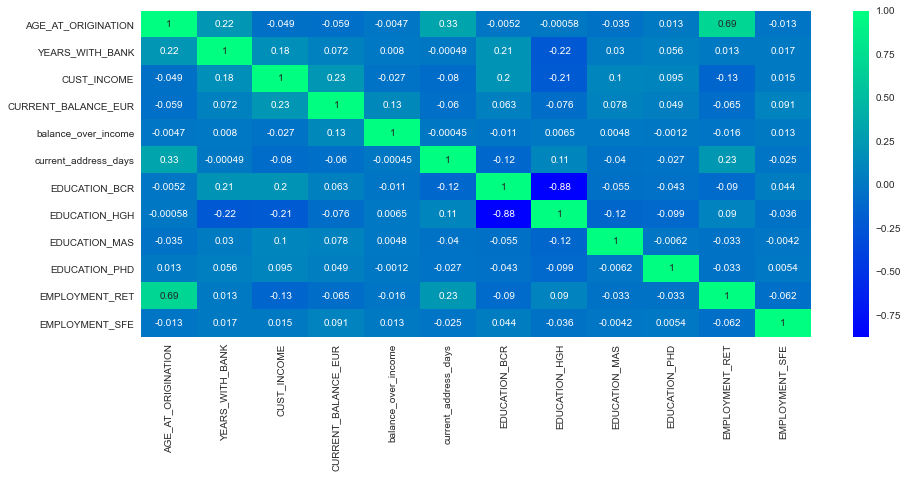

In [498]:
x_corr = X_train.corr()
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(x_corr, annot=True, cmap="winter", ax=ax)

### To start we will try a few basic classifiers with standard parameters, and use cross-validation to test metrics. The metric we should use is the accuracy ratio, which will address the problem with highly unbalanced data. For cross-validation, we will use the repeated stratified k-fold method.

In [343]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold

# Parameters for cross-validation and splitting data.
# We will use our whole training set as a validation set because in cross-validation we use the Stratified K-fold method.
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
X_val = X_train
y_val = y_train
scoring = "roc_auc"

In [344]:
gnb = GaussianNB(priors=probes)
cvs = cross_val_score(gnb, X_val, y_val, scoring=scoring, cv=cv)
gnb.fit(X_val, y_val)
print(cvs)
print(cvs.mean())

[0.97488502 0.96996354 0.95829941 0.98690883 0.97157779 0.97754532
 0.97357429 0.97288178 0.96502089 0.97381025]
0.9724467110305552


In [345]:
lr1 = LogisticRegression(class_weight='balanced', max_iter = 20000)
cvs = cross_val_score(lr1, X_val, y_val, scoring=scoring, cv=cv)
lr1.fit(X_val, y_val)
print(cvs)
print(cvs.mean())

[0.99299306 0.99626535 0.9848269  0.99189352 0.99845306 0.98792046
 0.99590693 0.99893359 0.99245549 0.99106563]
0.9930713987352229


In [346]:
dt = tree.DecisionTreeClassifier(class_weight='balanced', random_state = 42)
cvs = cross_val_score(dt, X_val, y_val, scoring=scoring, cv=cv)
dt.fit(X_val, y_val)
print(cvs)
print(cvs.mean())

[0.93210614 0.92265213 0.91415625 0.92382474 0.95121951 0.92202182
 0.97040824 0.96109154 0.87700671 0.90279081]
0.9277277899160609


In [347]:
knn = KNeighborsClassifier(weights='distance')
cvs = cross_val_score(knn, X_val, y_val, scoring=scoring, cv=cv)
knn.fit(X_val, y_val)
print(cvs)
print(cvs.mean())

[0.93184688 0.95234787 0.92405926 0.92393536 0.95140893 0.93224366
 0.97127774 0.97121137 0.88616854 0.91247384]
0.9356973457065131


In [348]:
rf = RandomForestClassifier(class_weight='balanced', random_state = 42)
cvs = cross_val_score(rf, X_val, y_val, scoring=scoring, cv=cv)
rf.fit(X_val, y_val)
print(cvs)
print(cvs.mean())

[0.98885382 0.97870721 0.94962654 0.989566   0.9786653  0.97807963
 0.98989566 0.99894465 0.97694166 0.97919523]
0.9808475702630259


In [349]:
svc = SVC(class_weight='balanced', gamma='auto', random_state=42)
cvs = cross_val_score(svc, X_val, y_val, scoring=scoring, cv=cv)
svc.fit(X_val, y_val)
print(cvs)
print(cvs.mean())

[0.98029128 0.9843844  0.97334419 0.98820312 0.98669541 0.95545135
 0.98304365 0.99532284 0.98740663 0.97977251]
0.9813915391603183


### We can see that we got pretty decent results from these classifiers. The one which gave the best results is the Logistic Regression, but let's try to find a better set of parameters for these classifiers. We will use methods grid and random search to find better parameters.

In [350]:
# We will import both grid search and random search for tuning parameters,
# then define a function to print those parameters.
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

def clf_performance(classifier, model_name):
    print(model_name)
    print(f'Best Score: {classifier.best_score_}')
    print(f'Best Parameters: {classifier.best_params_}')

In [351]:
lr = LogisticRegression(random_state=42)
param_grid = {'max_iter' : [2000, 5000, 10000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 10),
              'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'saga', 'sag'],
              'class_weight': ['balanced']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, scoring=scoring, cv = cv, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_val, y_val)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 1459 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1930 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2544 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  7.9min finished


Logistic Regression
Best Score: 0.9932993907761396
Best Parameters: {'C': 0.005994842503189409, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'}


In [352]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.linspace(1, 200, 1, dtype=np.int32),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = cv, scoring=scoring, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_val, y_val)
clf_performance(best_clf_knn,'KNN')

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   55.7s finished


KNN
Best Score: 0.9014584944483609
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [353]:
svc = SVC(probability = True, random_state=42)
from scipy.stats import loguniform
np.random.seed(42)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': loguniform(1e-3,1e2),
                                  'C': loguniform(1e-3,1e2), 'class_weight': ['balanced']},
                                 {'kernel': ['linear'], 'C': loguniform(1e-3,1e2),
                                  'class_weight': ['balanced']},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': loguniform(1e-3,1e2),
                                  'class_weight': ['balanced']},
                                 {'kernel': ['sigmoid'], 'coef0': loguniform(1e-3,1e2), 
                                  'C': loguniform(1e-3,1e2), 'class_weight': ['balanced']}]
clf_svc = RandomizedSearchCV(svc, param_distributions=param_grid, scoring=scoring, n_iter=40, cv=cv, verbose=True, n_jobs=-1)
best_clf_svc = clf_svc.fit(X_val, y_val)
clf_performance(best_clf_svc, 'SVC')

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 72.5min finished


SVC
Best Score: 0.9932786384356709
Best Parameters: {'C': 0.001009006186915156, 'class_weight': 'balanced', 'kernel': 'linear'}


In [354]:
from scipy.stats import randint
np.random.seed(42)
rf = RandomForestClassifier(random_state = 42)
param_grid =  {'n_estimators': randint(50,1000),
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': randint(5,50),
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3], 
                                  'class_weight': ['balanced', 'balanced_subsample']}
                                  
clf_rf = RandomizedSearchCV(rf, param_distributions = param_grid, scoring=scoring, n_iter = 50, cv = cv, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf.fit(X_val, y_val)
clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 25.4min finished


Random Forest
Best Score: 0.993705374955498
Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 721}


### From the cells above we can see that we tuned results a little bit. The best classifier is random forest. Now we will show some results on training and testing data.

In [361]:
# Deffining the best classifier 
best_clf = best_clf_rf_rnd.best_estimator_

In [362]:
y_pred = best_clf.predict(X_train)

from sklearn.metrics import confusion_matrix, balanced_accuracy_score
print(balanced_accuracy_score(y_train, y_pred))
confusion_matrix(y_train, y_pred)

0.9808260407677467


array([[21233,    88],
       [    9,   254]], dtype=int64)

In [363]:
# First, we need to scale test data with the scaler we scaled first.
X_test = pd.DataFrame(scaler1.transform(X_test_raw), columns=X_test_raw.columns)
X_test.describe()

,AGE_AT_ORIGINATION,YEARS_WITH_BANK,CUST_INCOME,CURRENT_BALANCE_EUR,balance_over_income,current_address_days,EDUCATION_BCR,EDUCATION_HGH,EDUCATION_MAS,EDUCATION_PHD,EMPLOYMENT_RET,EMPLOYMENT_SFE
count,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000
mean,-0.024864,-0.016024,0.014819,0.054411,-0.016508,-0.025490,-0.020789,0.008676,0.040795,0.001974,-0.045804,0.002183
std,0.986889,0.994512,1.359976,1.309194,0.172847,1.002562,0.989594,0.997108,1.207780,1.014162,0.973229,1.010380
min,-2.077860,-1.706669,-0.815763,-0.398659,-0.112396,-1.522938,-0.619489,-1.412692,-0.088037,-0.069918,-0.587123,-0.105592
25%,-0.847325,-1.012688,-0.359626,-0.375971,-0.106161,-0.886632,-0.619489,-1.412692,-0.088037,-0.069918,-0.587123,-0.105592
50%,-0.078241,0.143947,-0.192192,-0.313286,-0.094004,-0.144928,-0.619489,0.707869,-0.088037,-0.069918,-0.587123,-0.105592
75%,0.767751,0.837928,0.062413,0.099679,0.020251,0.691501,1.614233,0.707869,-0.088037,-0.069918,-0.587123,-0.105592
max,3.305729,1.763236,54.326494,32.448692,2.720524,3.308853,1.614233,0.707869,11.358877,14.302514,1.703220,9.470432


In [364]:
y_pred = best_clf.predict(X_test)

from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score
print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.8333333333333334
0.9623573656572038


array([[2343,   13],
       [   3,   40]], dtype=int64)

### We can see that we got great results for the random forest model. Our balanced accuracy score, which is accurate for both classes, is pretty high on both training and testing data. We can use this model on our unlabeled data, potential customers. We will analyze this a little bit.

In [365]:
pc.head()

,Cocunut,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
0,80001,32,3,M,HGH,PVE,M,423.076923,1985-01-21,2005-01-01,2014-07-02,143.000000
1,80002,51,10,W,SEC,RET,F,140.610231,2010-10-23,9999-10-01,2007-02-21,2288.700154
2,80003,36,7,M,BCR,STE,F,326.923077,1981-10-16,2009-09-10,2009-10-26,2268.491692
3,80004,46,11,D,BCR,TEA,F,738.820000,2008-09-01,2005-11-01,2005-11-30,4536.983462
4,80005,39,10,M,HGH,PVE,M,483.928231,1993-09-01,2013-06-01,2006-12-05,3076.923077


In [366]:
print(len(pc))
pc.info()

2747
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cocunut                 2747 non-null   int64  
 1   AGE                     2747 non-null   int64  
 2   YEARS_WITH_BANK         2747 non-null   int64  
 3   MARTIAL_STATUS          2747 non-null   object 
 4   EDUCATION               2747 non-null   object 
 5   EMPLOYMENT              2747 non-null   object 
 6   GENDER                  2747 non-null   object 
 7   CUST_INCOME             2747 non-null   float64
 8   CURRENT_ADDRESS_DATE    2747 non-null   object 
 9   CURRENT_JOB_DATE        2747 non-null   object 
 10  CURRENT_WITH_BANK_DATE  2747 non-null   object 
 11  CURRENT_BALANCE_EUR     2747 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 257.7+ KB


We can see that there are no nan values. Now we will check dates and categorical data.

In [367]:
pc["MARTIAL_STATUS"].unique()

array(['M', 'W', 'D', 'S', '*noval*'], dtype=object)

In [368]:
pc["EDUCATION"].unique()

array(['HGH', 'SEC', 'BCR', 'MAS', 'PRS', 'PHD', 'PRI', 'OTH'],
      dtype=object)

In [369]:
pc["EMPLOYMENT"].unique()

array(['PVE', 'RET', 'STE', 'TEA', 'SFE', 'OTH'], dtype=object)

In [370]:
pc.groupby("EMPLOYMENT").count()

,Cocunut,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
EMPLOYMENT,,,,,,,,,,,
OTH,73,73,73,73,73,73,73,73,73,73,73
PVE,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186
RET,699,699,699,699,699,699,699,699,699,699,699
SFE,41,41,41,41,41,41,41,41,41,41,41
STE,742,742,742,742,742,742,742,742,742,742,742
TEA,6,6,6,6,6,6,6,6,6,6,6


### We can see that we have a new category in this dataset, so we will drop this category after one-hot encoding.

In [371]:
pc["GENDER"].describe()

count     2747
unique       2
top          M
freq      1379
Name: GENDER, dtype: object

In [372]:
pc["GENDER"] = (pc["GENDER"] == "F").astype(int)
pc.head()

,Cocunut,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
0,80001,32,3,M,HGH,PVE,0,423.076923,1985-01-21,2005-01-01,2014-07-02,143.000000
1,80002,51,10,W,SEC,RET,1,140.610231,2010-10-23,9999-10-01,2007-02-21,2288.700154
2,80003,36,7,M,BCR,STE,1,326.923077,1981-10-16,2009-09-10,2009-10-26,2268.491692
3,80004,46,11,D,BCR,TEA,1,738.820000,2008-09-01,2005-11-01,2005-11-30,4536.983462
4,80005,39,10,M,HGH,PVE,0,483.928231,1993-09-01,2013-06-01,2006-12-05,3076.923077


In [373]:
print(pc.loc[pc["CURRENT_WITH_BANK_DATE"]<"1900"])
pc.loc[pc["CURRENT_WITH_BANK_DATE"]>"2021"]

Empty DataFrame
Columns: [Cocunut, AGE, YEARS_WITH_BANK, MARTIAL_STATUS, EDUCATION, EMPLOYMENT, GENDER, CUST_INCOME, CURRENT_ADDRESS_DATE, CURRENT_JOB_DATE, CURRENT_WITH_BANK_DATE, CURRENT_BALANCE_EUR]
Index: []


,Cocunut,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR


In [374]:
print(pc.loc[pc["CURRENT_ADDRESS_DATE"]<"1900"])
pc.loc[pc["CURRENT_ADDRESS_DATE"]>"2021"]

Empty DataFrame
Columns: [Cocunut, AGE, YEARS_WITH_BANK, MARTIAL_STATUS, EDUCATION, EMPLOYMENT, GENDER, CUST_INCOME, CURRENT_ADDRESS_DATE, CURRENT_JOB_DATE, CURRENT_WITH_BANK_DATE, CURRENT_BALANCE_EUR]
Index: []


,Cocunut,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
414,80415,55,12,M,HGH,STE,0,446.153846,9999-10-01,9999-10-01,2005-05-20,158.461538
977,80978,66,0,*noval*,HGH,OTH,0,0.000000,9999-10-01,9999-10-01,2016-10-11,0.000000
1360,81361,39,4,*noval*,HGH,OTH,1,0.000000,9999-10-01,9999-10-01,2013-05-16,4615.384615
1374,81375,70,2,M,HGH,OTH,0,182.473231,9999-10-01,9999-10-01,2015-01-06,1975.961538
1387,81388,53,0,*noval*,HGH,OTH,0,0.000000,9999-10-01,9999-10-01,2016-09-14,2307.692308
...,...,...,...,...,...,...,...,...,...,...,...,...
2663,82664,33,3,*noval*,HGH,OTH,0,0.000000,9999-10-01,9999-10-01,2014-02-22,2307.692308
2667,82668,32,3,M,BCR,OTH,1,538.461538,9999-10-01,9999-10-01,2014-03-14,449.713846
2700,82701,36,3,*noval*,HGH,OTH,1,0.000000,9999-10-01,9999-10-01,2014-03-12,7692.307692
2723,82724,23,1,*noval*,HGH,OTH,0,0.000000,9999-10-01,9999-10-01,2015-10-24,4615.384615


In [375]:
pc.loc[pc["CURRENT_ADDRESS_DATE"]>"2021"]["CURRENT_ADDRESS_DATE"].unique()

array(['9999-10-01'], dtype=object)

In [376]:
print(pc.loc[pc["CURRENT_JOB_DATE"]<"1900"])
pc.loc[pc["CURRENT_JOB_DATE"]>"2021"]

Empty DataFrame
Columns: [Cocunut, AGE, YEARS_WITH_BANK, MARTIAL_STATUS, EDUCATION, EMPLOYMENT, GENDER, CUST_INCOME, CURRENT_ADDRESS_DATE, CURRENT_JOB_DATE, CURRENT_WITH_BANK_DATE, CURRENT_BALANCE_EUR]
Index: []


,Cocunut,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
1,80002,51,10,W,SEC,RET,1,140.610231,2010-10-23,9999-10-01,2007-02-21,2288.700154
6,80007,64,8,W,HGH,RET,1,237.634000,1978-10-01,9999-10-01,2009-06-10,2307.692308
7,80008,74,11,M,HGH,RET,0,221.043077,1996-10-20,9999-10-01,2006-05-26,790.384615
13,80014,65,2,M,HGH,RET,0,504.054462,2003-01-01,9999-10-01,2014-12-17,5771.358923
18,80019,65,12,M,BCR,RET,1,387.967231,1996-01-01,9999-10-01,2005-02-23,2405.833385
...,...,...,...,...,...,...,...,...,...,...,...,...
2724,82725,25,0,S,HGH,OTH,1,320.880615,9999-10-01,9999-10-01,2016-10-17,3846.153846
2726,82727,67,8,M,HGH,RET,0,223.748846,1960-01-01,9999-10-01,2008-11-03,5335.096154
2728,82729,61,12,M,HGH,RET,0,392.868385,1969-01-01,9999-10-01,2005-06-23,2307.692308
2738,82739,67,8,M,HGH,RET,1,253.234846,1981-04-01,9999-10-01,2009-01-27,4742.307692


In [377]:
pc.loc[pc["CURRENT_JOB_DATE"]>"2021"]["CURRENT_JOB_DATE"].unique()

array(['9999-10-01'], dtype=object)

### We can see that both in "CURRENT_JOB_DATE" and "CURRENT_ADDRESS_DATE" we have "9999-10-01", which we will change in "2021-01-01" like the retail data table.

In [378]:
pc.replace("9999-10-01", "2021-01-01", inplace=True)
pc.loc[pc["CURRENT_JOB_DATE"]>"2021-01-02"]

,Cocunut,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR


### Now we will start to add features we added to the last table.

In [379]:
# Everything we applied to the last table, we are going to apply to this one, with a slight difference.
pc["balance_over_income"] = pc["CURRENT_BALANCE_EUR"]/(pc["CUST_INCOME"]+1) # add 1 to avoid possible division with 0
a = (pd.to_datetime(pc["CURRENT_WITH_BANK_DATE"]) - pd.to_datetime(pc["CURRENT_ADDRESS_DATE"]))/np.timedelta64(1, 'D') + pc["YEARS_WITH_BANK"]*365   
a[a<0]=0
pc["current_address_days"] = a
a = (pd.to_datetime(pc["CURRENT_WITH_BANK_DATE"]) - pd.to_datetime(pc["CURRENT_JOB_DATE"]))/np.timedelta64(1, 'D') + pc["YEARS_WITH_BANK"]*365
a[a<0] = 0
pc["current_job_days"] = a
pc["time_mortgage_days"] = (pd.to_datetime("2021-01-01") - pd.to_datetime(pc["CURRENT_WITH_BANK_DATE"]))/np.timedelta64(1, 'D') + pc["YEARS_WITH_BANK"]*365

pc = pd.get_dummies(pc, columns=['MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT'])

pc["MARTIAL_STATUS_N_S"] = pc["MARTIAL_STATUS_*noval*"] | pc["MARTIAL_STATUS_S"]
pc["MARTIAL_STATUS_D_M_W"] = pc["MARTIAL_STATUS_D"] | pc["MARTIAL_STATUS_M"] | pc["MARTIAL_STATUS_W"]
pc["EDUCATION_OTH_PRI_PRS_SEC"] = pc["EDUCATION_OTH"] | pc["EDUCATION_PRI"] | pc["EDUCATION_PRS"] | pc["EDUCATION_SEC"]

pc.drop(['MARTIAL_STATUS_*noval*', 'MARTIAL_STATUS_D', 'MARTIAL_STATUS_M',
         'MARTIAL_STATUS_S', 'MARTIAL_STATUS_W','EDUCATION_PRI',
         'EDUCATION_PRS', 'EDUCATION_SEC', 'EDUCATION_OTH'], axis=1, inplace=True)
pc.drop(['EMPLOYMENT_STE', 'MARTIAL_STATUS_N_S', 'MARTIAL_STATUS_D_M_W','EDUCATION_OTH_PRI_PRS_SEC', 'EMPLOYMENT_TEA', 'EMPLOYMENT_OTH', 'EMPLOYMENT_PVE', 'current_job_days', 'time_mortgage_days', 'GENDER'], axis=1, inplace=True)
cocunut = pc["Cocunut"]
pc.drop(["Cocunut", "CURRENT_ADDRESS_DATE", "CURRENT_JOB_DATE", "CURRENT_WITH_BANK_DATE"], axis=1, inplace=True)
pc.head()


,AGE,YEARS_WITH_BANK,CUST_INCOME,CURRENT_BALANCE_EUR,balance_over_income,current_address_days,EDUCATION_BCR,EDUCATION_HGH,EDUCATION_MAS,EDUCATION_PHD,EMPLOYMENT_RET,EMPLOYMENT_SFE
0,32,3,423.076923,143.000000,0.337203,11849.0,0,1,0,0,0,0
1,51,10,140.610231,2288.700154,16.161969,2310.0,0,0,0,0,1,0
2,36,7,326.923077,2268.491692,6.917756,12792.0,1,0,0,0,0,0
3,46,11,738.820000,4536.983462,6.132550,3009.0,1,0,0,0,0,0
4,39,10,483.928231,3076.923077,6.345110,8493.0,0,1,0,0,0,0


In [380]:
X_pc = pd.DataFrame(scaler1.transform(pc), columns=pc.columns)
X_pc.describe()

,AGE,YEARS_WITH_BANK,CUST_INCOME,CURRENT_BALANCE_EUR,balance_over_income,current_address_days,EDUCATION_BCR,EDUCATION_HGH,EDUCATION_MAS,EDUCATION_PHD,EMPLOYMENT_RET,EMPLOYMENT_SFE
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,-0.021575,-0.089401,-0.026192,0.244867,1.299781,-0.041699,-0.016946,0.032408,0.011973,0.003331,-0.004324,0.037334
std,1.014174,1.046249,0.714255,0.504363,9.123977,0.997179,0.991572,0.988162,1.065463,1.023610,0.997756,1.161345
min,-2.154768,-1.706669,-0.815763,-0.398659,-0.112396,-1.522938,-0.619489,-1.412692,-0.088037,-0.069918,-0.587123,-0.105592
25%,-0.847325,-1.012688,-0.356011,-0.135905,-0.054680,-0.888299,-0.619489,-1.412692,-0.088037,-0.069918,-0.587123,-0.105592
50%,-0.001333,0.143947,-0.189605,0.076921,0.022537,-0.152099,-0.619489,0.707869,-0.088037,-0.069918,-0.587123,-0.105592
75%,0.844660,0.837928,0.063370,0.552500,0.133058,0.652394,1.614233,0.707869,-0.088037,-0.069918,1.703220,-0.105592
max,1.921378,1.763236,16.276122,3.347335,151.674651,2.872920,1.614233,0.707869,11.358877,14.302514,1.703220,9.470432


In [381]:
y_pc = best_clf.predict(X_pc)
print(sum(y_pc))

41


In [383]:
pc2 = pd.read_csv("Potential Customers.csv", sep=";", decimal=",")
pc2.loc[np.where(y_pc==1)]

,Cocunut,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
28,80029,46,15,M,BCR,STE,F,602.386385,2010-01-01,1996-08-01,2002-06-01,7629.000615
39,80040,45,8,M,BCR,STE,F,681.276923,2010-11-01,1994-02-10,2009-04-21,9484.615385
139,80140,35,12,S,BCR,TEA,F,1033.438462,1982-02-28,2014-03-10,2005-05-14,12269.909310
358,80359,40,11,M,BCR,PVE,M,1992.530769,1996-10-01,2005-11-01,2005-12-08,15384.615380
422,80423,34,9,M,BCR,PVE,F,1158.215385,2012-01-01,2016-01-01,2008-06-26,13846.153850
490,80491,42,12,M,HGH,PVE,M,816.850769,2008-08-22,2010-01-01,2005-02-16,9449.869385
532,80533,46,15,M,BCR,STE,M,1524.069231,2011-05-01,2009-07-15,2002-02-06,13846.153850
588,80589,40,6,M,BCR,STE,F,468.351539,2011-07-01,2012-09-01,2010-07-06,9484.615385
689,80690,59,12,M,MAS,STE,F,873.043385,1958-10-01,1989-12-07,2005-02-26,18176.994150
808,80809,34,11,D,HGH,PVE,F,610.579308,1983-03-21,2010-01-01,2005-09-26,9477.346769


### Finally, we got the list of potential customers, at the table above.